# Investigation of binary classificator
Lukas Forst

Some links
- https://stackoverflow.com/a/60352612/7169288


In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score,roc_auc_score

np.random.seed(123)

%matplotlib inline

In [388]:
data_root = 'data'
ground_truth_file = 'GT'
c_names = np.array(['C1', 'C2', 'C3', 'C4', 'C5'])
# data X[j]
j = 100
# number of alpha parameters
k = 50
# number of classificators
i = 5

In [389]:
c_data = np.array([
    np.genfromtxt(f'{data_root}/{c}.dsv', delimiter=',',dtype=np.dtype('uint8'), encoding='utf-8')
    for c in c_names
])
c_data.shape

(5, 100, 50)

In [390]:
y = np.genfromtxt(f'{data_root}/{ground_truth_file}.dsv',dtype=np.dtype('uint8'), encoding='utf-8')
y.shape

(100,)

In [391]:
# performance -> when predicted match the label
np.array([np.array([np.count_nonzero(c_data[c, :, alpha] == y) for alpha in range(k)]) for c in range(i)])

array([[92, 93, 92, 93, 93, 94, 94, 94, 96, 96, 96, 96, 96, 95, 95, 95,
        95, 95, 95, 95, 96, 96, 97, 97, 97, 95, 90, 89, 86, 82, 80, 80,
        77, 74, 71, 69, 65, 65, 63, 61, 59, 58, 58, 58, 56, 55, 54, 53,
        52, 52],
       [64, 64, 65, 66, 69, 74, 75, 77, 78, 78, 79, 79, 81, 81, 81, 82,
        82, 83, 84, 85, 85, 86, 86, 86, 86, 86, 86, 86, 85, 86, 87, 87,
        87, 85, 83, 81, 78, 76, 75, 73, 68, 65, 60, 57, 56, 54, 51, 51,
        51, 50],
       [52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 55, 56, 56, 56, 56,
        56, 56, 56, 56, 56, 56, 56, 56, 57, 58, 58, 58, 59, 59, 60, 60,
        60, 60, 61, 61, 61, 62, 62, 62, 62, 63, 63, 64, 67, 67, 67, 67,
        68, 68],
       [50, 50, 51, 51, 52, 53, 53, 56, 59, 64, 69, 73, 79, 80, 84, 84,
        84, 83, 84, 84, 85, 85, 84, 83, 83, 81, 81, 81, 82, 81, 80, 81,
        81, 81, 82, 83, 84, 84, 84, 84, 83, 83, 82, 83, 83, 83, 81, 79,
        79, 77],
       [63, 64, 67, 69, 71, 72, 73, 76, 78, 83, 85, 84, 87, 89, 89, 

In [392]:
def binary_classification_performance(data, y_true, c, c_names, a):
    y_pred = data[c, :, a]
    
    tn, fp, fn, tp = confusion_matrix(y_true = y_true, y_pred = y_pred).ravel()
    accuracy = accuracy_score(y_true = y_true, y_pred = y_pred)
    precision = precision_score(y_true = y_true, y_pred = y_pred, zero_division = 0)
    recall = recall_score(y_true = y_true, y_pred = y_pred, zero_division = 0)
    f1_score = (2 * precision * recall / (precision + recall)) if precision + recall != 0 else math.nan

    specificity = tn / (tn + fp)
    npv = tn / (tn + fn)
    auc_roc = roc_auc_score(y_true = y_true, y_score = y_pred)

    result = pd.DataFrame({
        'Alpha': [a],
        'Classificator': [c_names[c]],
        'Accuracy' : [accuracy],
        'Precision/PPV' : [precision],
        'Recall/Senitivity/TPR' : [recall],
        'F1 Score' : [f1_score],
        'AUC_ROC' : [auc_roc],
        'Specificty/TNR': [specificity],
        'NPV' : [npv],
        'True Positive' : [tp],
        'True Negative' : [tn],
        'False Positive':[fp],
        'False Negative':[fn]})
    return result

In [393]:
pds = [binary_classification_performance(c_data, y, c, c_names, a) for a in range(k) for c in range(i)]
df = pd.concat(pds)
df = df.set_index(['Classificator', 'Alpha'], inplace=False)
df.head()

,,Accuracy,Precision/PPV,Recall/Senitivity/TPR,F1 Score,AUC_ROC,Specificty/TNR,NPV,True Positive,True Negative,False Positive,False Negative
Classificator,Alpha,,,,,,,,,,,
C1,0,0.92,0.862069,1.0,0.925926,0.92,0.84,1.0,50,42,8,0
C2,0,0.64,0.581395,1.0,0.735294,0.64,0.28,1.0,50,14,36,0
C3,0,0.52,0.510204,1.0,0.675676,0.52,0.04,1.0,50,2,48,0
C4,0,0.50,0.000000,0.0,NaN,0.50,1.00,0.5,0,50,0,50
C5,0,0.63,0.574713,1.0,0.729927,0.63,0.26,1.0,50,13,37,0


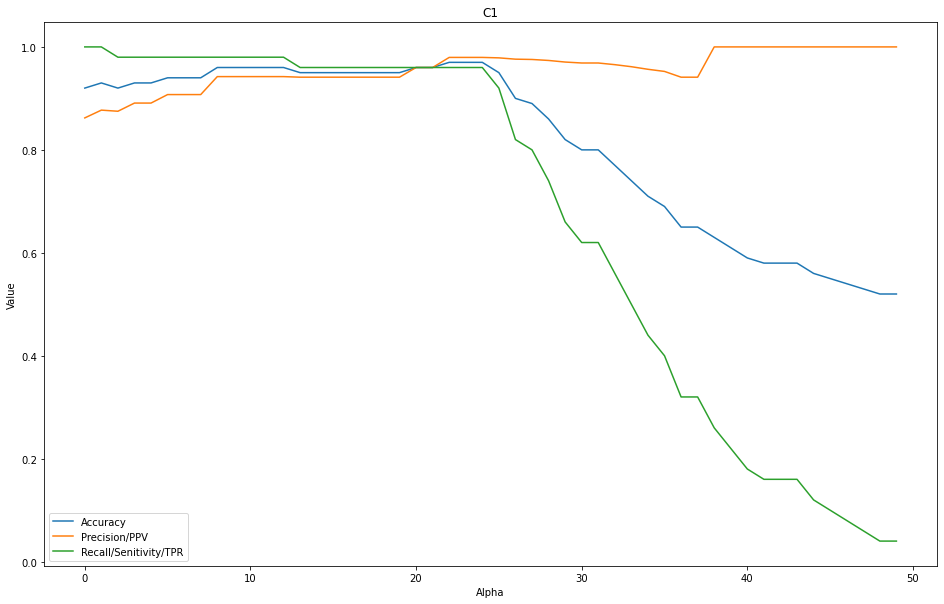

In [408]:
c1 = df.loc['C1']
c1sb = c1.plot(
    y=['Accuracy', 'Precision/PPV', 'Recall/Senitivity/TPR'], 
    figsize=(16,10),
    ylabel='Value',
    xlabel='Alpha',
    title='C1'
)

<Figure size 432x288 with 0 Axes>

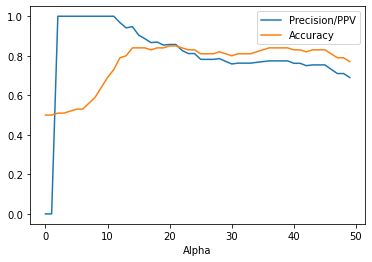

In [395]:
roc = df.loc['C4'][['Precision/PPV', 'Accuracy']]
plt.figure();
roc.plot();

<AxesSubplot:xlabel='Alpha', ylabel='Value'>

<Figure size 432x288 with 0 Axes>

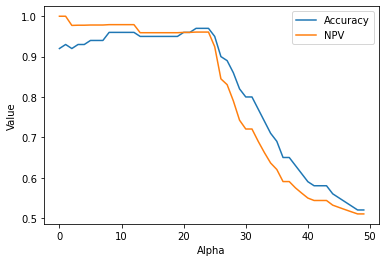

In [396]:
c1 = df.loc['C1']
plt.figure()
c1.plot(y=['Accuracy', 'NPV'], ylabel='Value', xlabel='Alpha')

In [397]:
# solution for the most secure thingy
no_fn = df[df['False Positive'] == df['False Positive'].min()]
no_fn[no_fn['Accuracy'] == no_fn['Accuracy'].max()]

,,Accuracy,Precision/PPV,Recall/Senitivity/TPR,F1 Score,AUC_ROC,Specificty/TNR,NPV,True Positive,True Negative,False Positive,False Negative
Classificator,Alpha,,,,,,,,,,,
C4,11,0.73,1.0,0.46,0.630137,0.73,1.0,0.649351,23,50,0,27


In [398]:
df[df.Accuracy == df.Accuracy.max()]

Accuracy  Precision/PPV  Recall/Senitivity/TPR  F1 Score  \
Classificator Alpha                                                             
C1            22         0.97       0.979592                   0.96  0.969697   
              23         0.97       0.979592                   0.96  0.969697   
              24         0.97       0.979592                   0.96  0.969697   

                     AUC_ROC  Specificty/TNR       NPV  True Positive  \
Classificator Alpha                                                     
C1            22        0.97            0.98  0.960784             48   
              23        0.97            0.98  0.960784             48   
              24        0.97            0.98  0.960784             48   

                     True Negative  False Positive  False Negative  
Classificator Alpha                                                 
C1            22                49               1               2  
              23                49               1               2  
              24                49               1               2

In [399]:
c, a = 0, 22
print(f'Accuracy: {np.count_nonzero(c_data[c, :, a] == y) / len(y)}')
t_p = np.count_nonzero((c_data[c, :, a] == 1) & (y == 1))
t_n = np.count_nonzero((c_data[c, :, a] == 0) & (y == 0))
f_p = np.count_nonzero((c_data[c, :, a] == 1) & (y == 0))
f_n = np.count_nonzero((c_data[c, :, a] == 0) & (y == 1))
print(f'TP {t_p}\nTN {t_n}\nFP {f_p}\nFN {f_n}')

Accuracy: 0.97
TP 48
TN 49
FP 1
FN 2


In [400]:
np.count_nonzero(c_data[c, :, a] == y)

97

In [401]:
matricies = np.array([np.array([confusion_matrix(c_data[c, :, a], y).ravel() for a in range(k)]) for c in range(i)])
matricies.shape

(5, 50, 4)

In [ ]:
accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test),2)
precision = round(precision_score(y_pred = y_pred, y_true = y_test),2)
recall = round(recall_score(y_pred = y_pred, y_true = y_test),2)
f1_score = round(2*precision*recall/(precision + recall),2)
specificity = round(tn/(tn+fp),2)
npv = round(tn/(tn+fn),2)
auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),2)